In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Loading data into a dataframe

In [218]:
df = pd.read_csv("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/data_raw/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Checking the null values

In [219]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [220]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [221]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


Based on data we are adding new column total scores

In [222]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]


In [223]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


Creating new directory to save processed data

In [224]:
os.makedirs("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/data_clean", exist_ok=True)


In [225]:
df.to_csv("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/data_clean/clean_data.csv", index=False)

Creating a new directory for visualizations

In [226]:
os.makedirs("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/analysis", exist_ok=True)


Creating plots and saving figures as png format

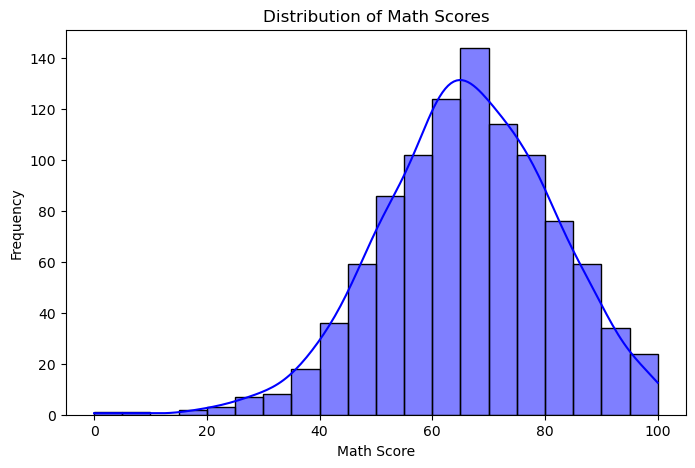

In [227]:
plt.figure(figsize=(8,5))
sns.histplot(df['math score'], bins=20, kde=True, color="blue")
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.savefig("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/analysis/student_performance_1.png")
plt.show()


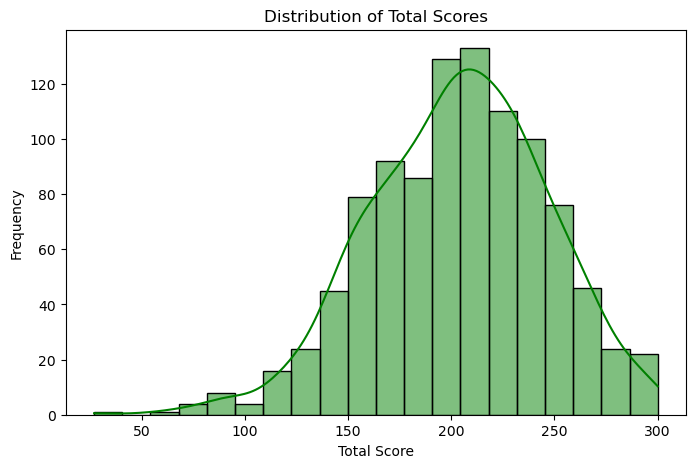

In [228]:
plt.figure(figsize=(8,5))
sns.histplot(df['total score'], bins=20, kde=True, color="green")
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.savefig("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/analysis/student_performance_2.png")
plt.show()


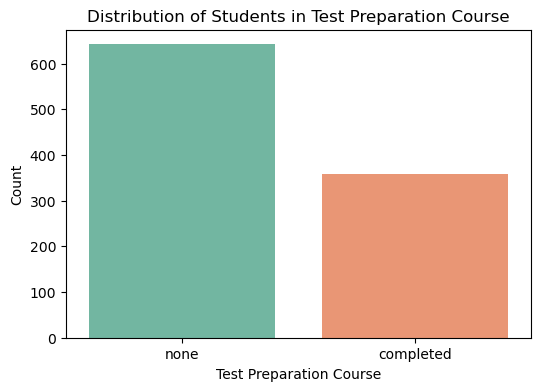

In [229]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["test preparation course"], hue=df["test preparation course"], palette="Set2", legend=False)
plt.title("Distribution of Students in Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Count")
plt.savefig("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/analysis/student_performance_3.png")
plt.show()


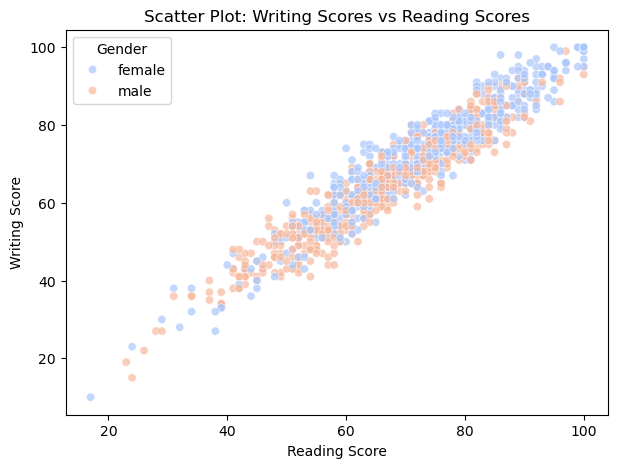

In [230]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["reading score"], y=df["writing score"], hue=df["gender"], alpha=0.7, palette="coolwarm")
plt.title("Scatter Plot: Writing Scores vs Reading Scores")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.legend(title="Gender")
plt.savefig("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/analysis/student_performance_4.png")
plt.show()


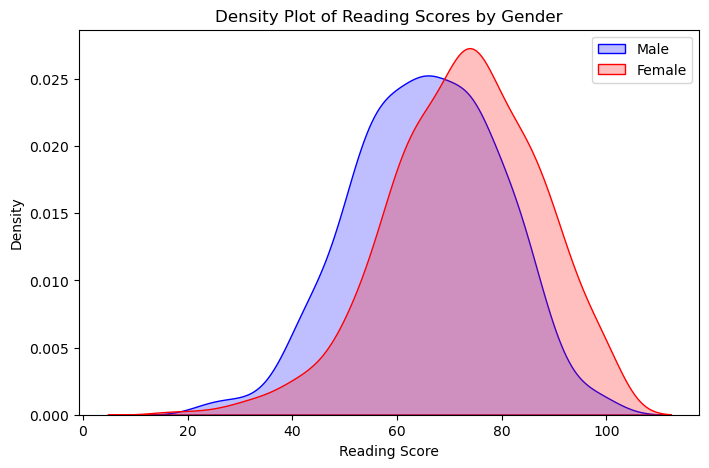

In [231]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["gender"] == "male"]["reading score"], label="Male", fill=True, color="blue")
sns.kdeplot(df[df["gender"] == "female"]["reading score"], label="Female", fill=True, color="red")
plt.title("Density Plot of Reading Scores by Gender")
plt.xlabel("Reading Score")
plt.ylabel("Density")
plt.legend()
plt.savefig("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/analysis/student_performance_5.png")  # Use relative path
plt.show()

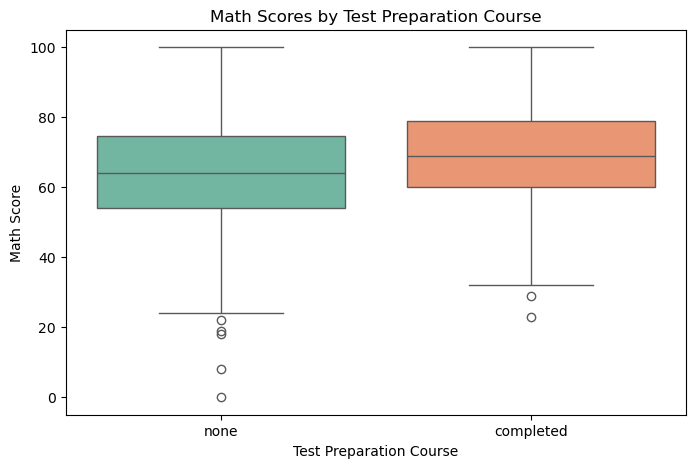

In [232]:
plt.figure(figsize=(8,5))
sns.boxplot(x="test preparation course", y="math score", hue="test preparation course", data=df, palette="Set2", legend=False)
plt.title("Math Scores by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score")
plt.savefig("/Users/dgmmz/OneDrive - University of Missouri/Documents/PDS/Assignment-1/student_performance/analysis/student_performance_6.png")
plt.show()